In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

# Question 2

# part1

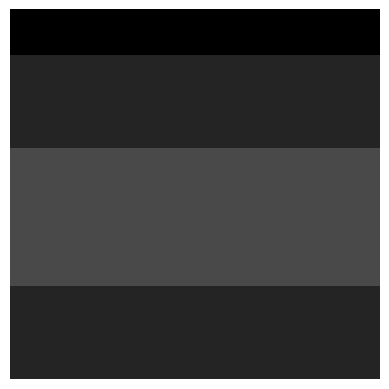

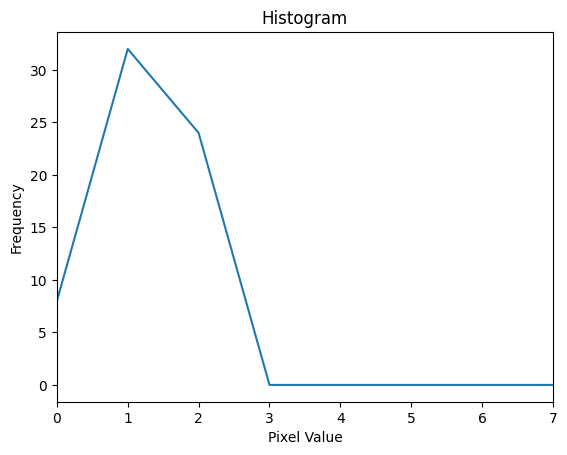

In [165]:
# Define photo_matrix here
photo_matrix = [[0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [2, 2, 2, 2, 2, 2, 2, 2],
                [2, 2, 2, 2, 2, 2, 2, 2],
                [2, 2, 2, 2, 2, 2, 2, 2],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1]]

# Create a single-channel (grayscale) image from the matrix
image1 = np.array(photo_matrix, dtype=np.uint8)

plt.imshow(image1, cmap='gray', vmin=0, vmax=7)
plt.axis('off')
plt.show()

# image, channel index, specific regions, number of bins, range of pixel values
hist = cv2.calcHist([image1], [0], None, [8], [0, 7])

# Convert histogram to numpy array
hist_array = np.squeeze(hist)

# Plot the histogram
plt.plot(hist)
plt.xlim([0, 7])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

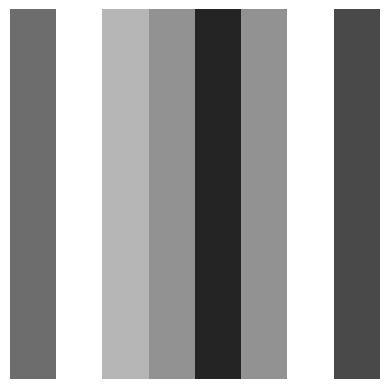

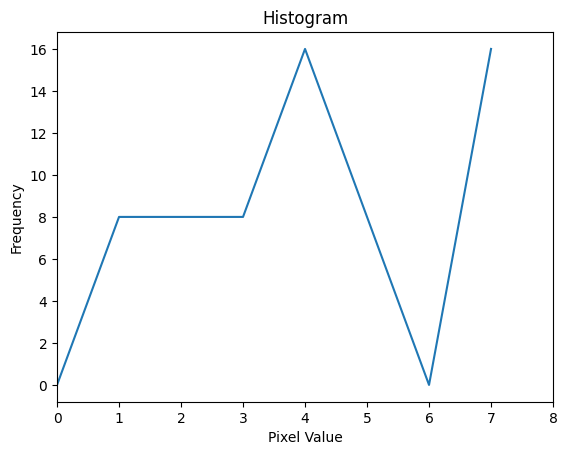

In [166]:
# Define photo_matrix here
# photo_matrix = [[4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3],
#                 [4, 7, 6, 5, 2, 5, 7, 3]]

photo_matrix = [[3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2],
                [3, 7, 5, 4, 1, 4, 7, 2]]

# Create a single-channel (grayscale) image from the matrix
image2 = np.array(photo_matrix, dtype=np.uint8)

plt.imshow(image2, cmap='gray', vmin=0, vmax=7)
plt.axis('off')
plt.show()

# image, channel index, specific regions, number of bins, range of pixel values
hist2 = cv2.calcHist([image2], [0], None, [8], [0, 8])

# Convert histogram to numpy array
hist_array = np.squeeze(hist2)

# Plot the histogram
plt.plot(hist2)
plt.xlim([0, 8])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# part2

Reading images

In [167]:
input = cv2.imread('input.png')
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
input_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

ref = cv2.imread('ref.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
ref_gray = cv2.imread('ref.png', cv2.IMREAD_GRAYSCALE)

In [168]:
def calc_hist_colorful(image):
      
  # Split the image into its three channels: Red, Green, and Blue (RGB)
  channels = cv2.split(image)

  # Set the range for intensity values (0-255)
  histRange = (0, 256)

  # Calculate histogram for each channel
  histograms = [cv2.calcHist([channel], [0], None, [256], histRange) for channel in channels]

  return histograms


In [169]:
def plot_histogram_color(color_image):
  # Plotting the histograms
  plt.imshow(color_image, vmin=0, vmax=255)
  image_color_histogram = calc_hist_colorful(color_image)

  colors = ('r', 'g', 'b')
  plt.figure()
  for i, color in enumerate(colors):
    plt.plot(image_color_histogram[i], color=color)
    plt.xlim([0, 256])
      
  plt.title('RGB Histogram')
  plt.xlabel('Intensity Value')
  plt.ylabel('Frequency')
  plt.show()
  

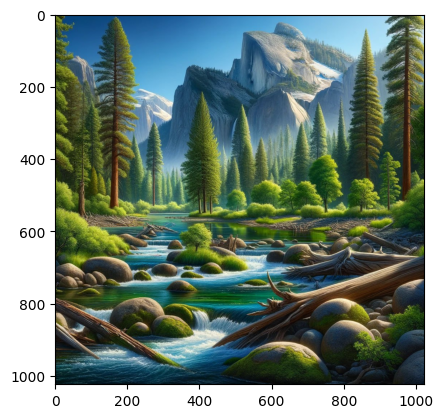

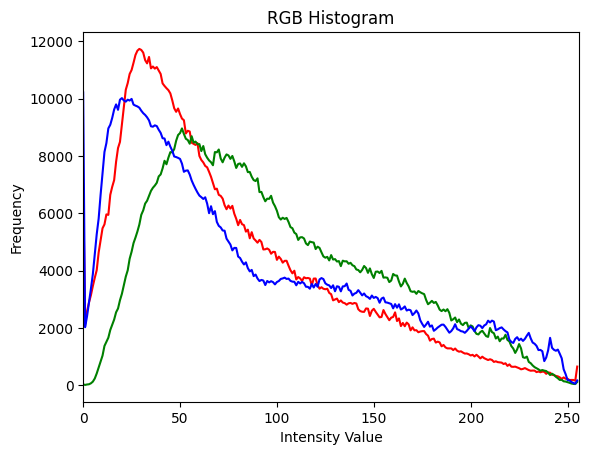

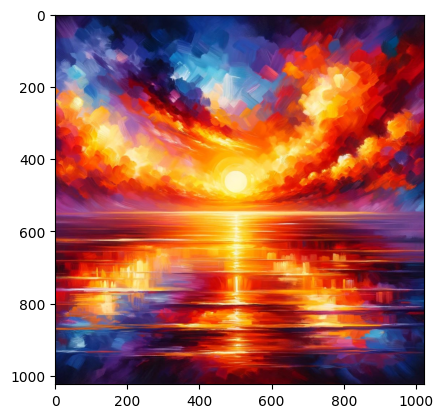

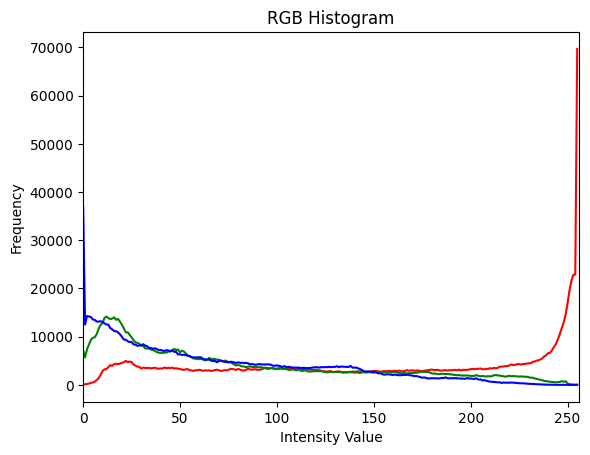

In [170]:
color_image = input

plot_histogram_color(color_image)
# print('input: ', color_image)

color_image = ref
plot_histogram_color(color_image)
# print('input: ', color_image)

np.arange(257) creates an array ranging from 0 to 256, inclusive, which effectively specifies that there are 256 bins for intensity values from 0 to 255.
[0]: After calculating the histogram using np.histogram(), the function returns a tuple containing two elements: the histogram values and the bin edges.
bin edges represent the boundaries that define the intervals (bins), For example, if you have intensity values ranging from 0 to 255 in a grayscale image, you might want to group these values into bins such that each bin represents a range of intensity values.

In [171]:
def calc_hist_gray(image):
  '''
  Do not use libraries
  calculate image histogram
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
  # # with built-in functions:
  # histogram_gray = cv2.calcHist([image], [0], None, [256], [0, 256])
  # histogram_array = np.squeeze(histogram_gray)
  # return histogram_array

  # # with for:
  # histogram = np.zeros(256, dtype=int)
  
  # for row in image:
  #     for intensity in row:
  #         histogram[intensity] += 1

  # return histogram


  # with numpy:
  histogram = np.histogram(image, bins=np.arange(257))[0]
  return histogram
  
  
  # # using Flatten and Counter:
  # # Flatten the grayscale image to a 1D array and convert to a Counter object
  # counter = Counter(image.flatten())

  # # Initialize histogram array with zeros and update with Counter values
  # histogram = [counter[i] for i in range(256)]

  # return histogram



In [172]:
def plot_histogram_gray(gray_image):
      
  plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
  image_gray_histogram = calc_hist_gray(gray_image)
  
  plt.figure()
  plt.plot(image_gray_histogram)
  plt.title('image gray histogram')
  plt.show()

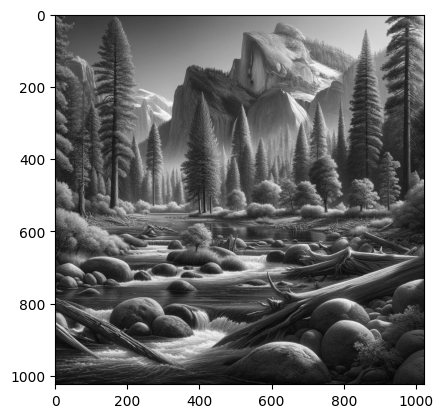

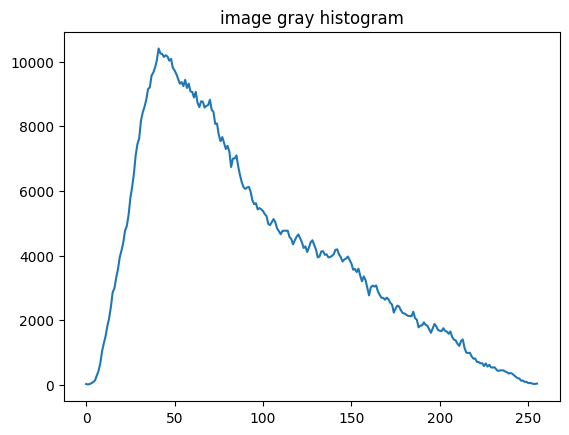

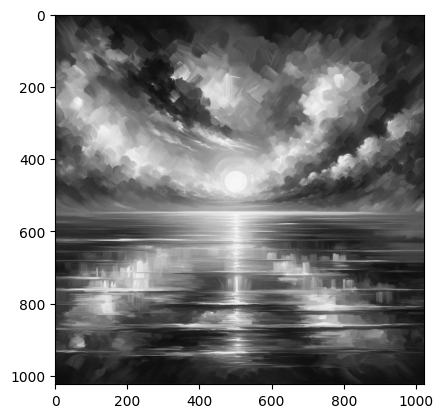

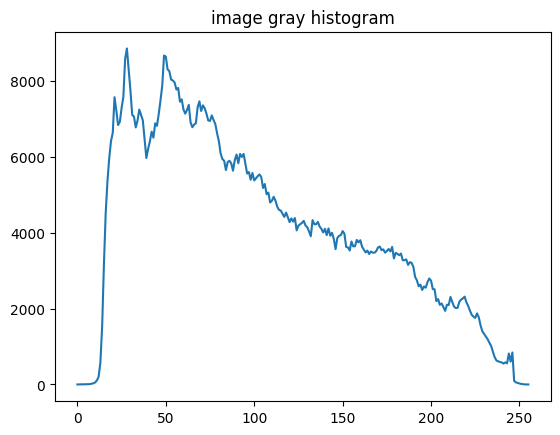

In [173]:
gray_image = input_gray

plot_histogram_gray(gray_image)
# print('input_gray: ', gray_image)

gray_image = ref_gray

plot_histogram_gray(gray_image)
# print('input_gray: ', gray_image)
  

Compute CDF,
Normalization,
Intensity Transformation,
Histogram Equalization

In [174]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  # Compute histogram of the channel
  histogram, _ = np.histogram(channel.flatten(), bins=np.arange(257), density=True)

  # Compute cumulative distribution function (CDF)
  cdf = histogram.cumsum()

  return cdf


In [175]:
def plot_cdf(image):
  # Split the image into its color channels
  b, g, r = cv2.split(image)

  # Calculate the cumulative distribution function (CDF) for each channel
  cdf_b = calc_cdf(b)
  cdf_g = calc_cdf(g)
  cdf_r = calc_cdf(r)
  
  plt.figure()
  # Plot the CDF curves for each channel
  plt.plot(cdf_b, color='blue', label='Blue Channel')
  plt.plot(cdf_g, color='green', label='Green Channel')
  plt.plot(cdf_r, color='red', label='Red Channel')

  # Set plot labels and title
  plt.title('Cumulative Distribution Function (CDF) for Color Channels')
  plt.xlabel('Intensity Value')
  plt.ylabel('Cumulative Probability')
  plt.legend()

  # Display the plot
  plt.show()
  
  

cumulative distribution (توزیع جمعی)

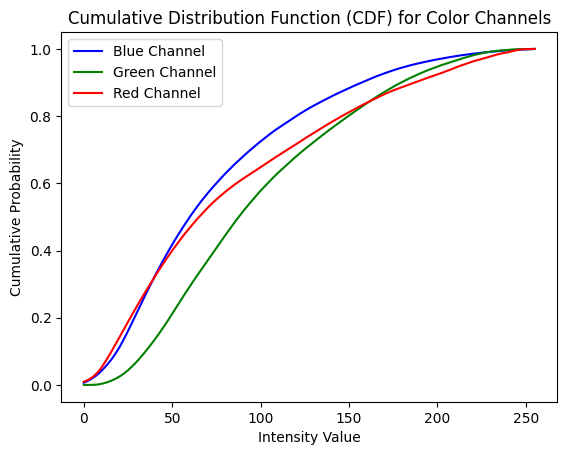

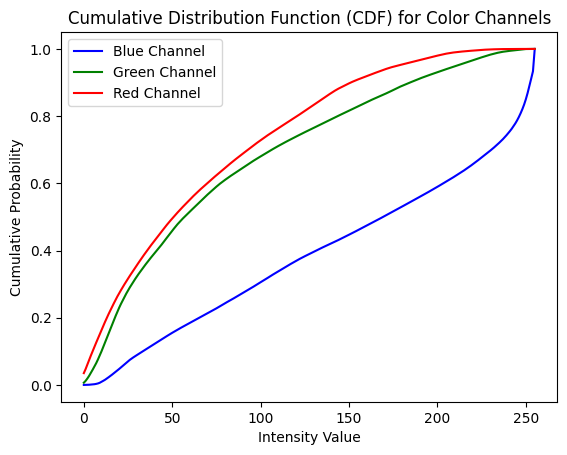

In [176]:
image = input
plot_cdf(image)

image = ref
plot_cdf(image)

In [177]:
def hist_matching(src_image, ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  
  # Calculate CDF of reference image for each channel
  cdf_ref = {}
  for channel, title in channels:
    cdf_ref[channel] = calc_cdf(ref_image[:,:,channel])
    
  # Calculate CDF of source image for each channel
  cdf_src = {}
  for channel, title in channels:
    cdf_src[channel] = calc_cdf(src_image[:,:,channel])
  
  # Histogram Matching
  for channel, title in channels:
    for intensity in range(256):
      # Find the intensity value in the reference image's CDF that matches the intensity value in the source image's CDF
      idx_ref = np.argmin(np.abs(cdf_ref[channel] - cdf_src[channel][intensity]))
      # Replace the intensity value in the source image with the matched intensity value from the reference image
      output_image[:,:,channel][src_image[:,:,channel] == intensity] = idx_ref

  return output_image

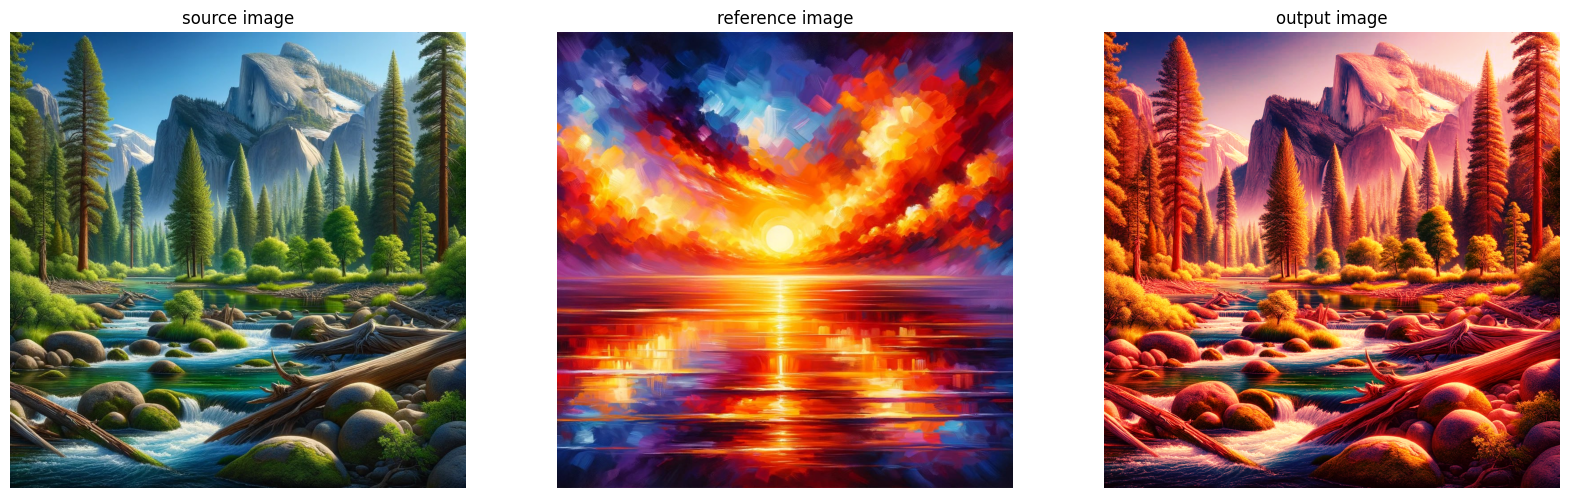

In [178]:
# Do not change this cell
src = cv2.imread('input.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

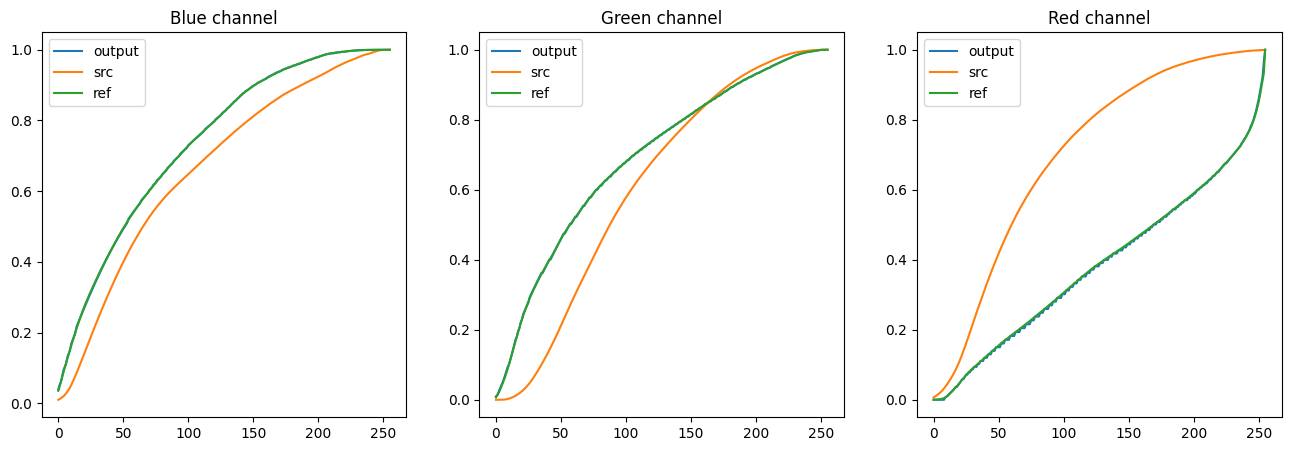

In [179]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src, ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)